In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Downloads\bzf.csv")

In [3]:
dff = pd.read_csv(r'C:\Users\KIIT\Downloads\bzr.csv')

In [4]:
df.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [5]:
df['label'] = 'fake'

In [6]:
df = df[['title', 'text', 'url', 'authors', 'source', 'meta_data', 'label']]

In [7]:
df.head()

,title,text,url,authors,source,meta_data,label
0,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,Wendy Gittleson,http://www.addictinginfo.org,"{""publisher"": ""Addicting Info | The Knowledge ...",fake
1,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,View All Posts,http://eaglerising.com,"{""description"": ""The possibility that CHAI dis...",fake
2,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,"View All Posts,Tony Elliott",http://eaglerising.com,"{""description"": ""Hillary Clinton may be the fi...",fake
3,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,John Prager,http://www.addictinginfo.org,"{""publisher"": ""Addicting Info | The Knowledge ...",fake
4,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,http://www.proudcons.com,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty...",fake


In [8]:
dff['label'] = 'real'

In [9]:
dff = dff[['title', 'text', 'url', 'authors', 'source', 'meta_data', 'label']]

In [10]:
df = pd.concat([df, dff])

In [11]:
df.shape

(182, 7)

In [12]:
df = df.sample(frac = 1)

In [13]:
df.head()

,title,text,url,authors,source,meta_data,label
42,Tebow DISMANTLES national anthem protests in o...,20.1k SHARES Facebook Twitter\n\nWhat do Tim T...,http://freedomdaily.com/tebow-dismantles-natio...,NaN,http://freedomdaily.com,"{""googlebot"": ""noimageindex"", ""generator"": ""Po...",fake
52,Paul Ryan ducks on stop-and-frisk,Story highlights Ryan called for calm in Charl...,http://cnn.it/2de7kZ4,"Deirdre Walsh,Cnn Senior Congressional Producer",http://cnn.it,"{""description"": ""House Speaker Paul Ryan ducke...",real
26,Fast Food CEO Threatens To Fire Everyone If A ...,"For decades, employers have been holding Ameri...",http://author.groopspeak.com/fast-food-ceo-thr...,NaN,http://author.groopspeak.com,"{""publisher"": ""Groopspeak"", ""description"": ""Th...",fake
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,"View All Posts,Leonora Cravotta",http://eaglerising.com,"{""description"": ""\u201cWe believe at this poin...",real
68,Bill And Hillary Clinton Have A MAJOR AIDS Sca...,"Over the past several months, the American pub...",http://www.thepoliticalinsider.com/clinton-aid...,NaN,http://www.thepoliticalinsider.com,"{""description"": ""This changes EVERYTHING!"", ""o...",fake


In [14]:
df.columns

Index(['title', 'text', 'url', 'authors', 'source', 'meta_data', 'label'], dtype='object')

In [15]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [16]:
df['title'] = df['title'].apply(tweet_cleaner)
df['text'] = df['text'].apply(tweet_cleaner)
df['meta_data'] = df['meta_data'].apply(tweet_cleaner)

In [17]:
def all_X(row):
    try:
        return row['title']+" "+row["text"]+" "+row["meta_data"]
    except: print("error", row)
        #giving out the error fields.
        
        
df["all_X"]= df.apply(all_X,axis=1)

In [18]:
df = df[['all_X', 'label']]

In [19]:
df.columns

Index(['all_X', 'label'], dtype='object')

In [20]:
#Assign text to X variable and labels to y

X = df.all_X
y = df.label

In [21]:
#Intialize Count Vectorizer
count_vec = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,2),
                           min_df = 3)
#Fit Count Vectorizer
dtm_cv = count_vec.fit_transform(X)
#Convert it to a pandas data frame
df_cv = pd.DataFrame(dtm_cv.toarray(), columns=count_vec.get_feature_names())

In [22]:
df_cv.head()

,abandon,abandoned,abc,abc abcnews,abc news,abcnews,abcnews abcnews,abcnews card,abcnews com,abcnews iphone,...,young,young adults,younger,zde,zde rd,zero,zuthf,zuthf dco,zyx,zyx bqy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_cv.shape

(182, 4191)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_cv,y,test_size=0.1)

In [36]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(x_train, y_train) 
pred = knn.predict(x_test) 

In [37]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 
print('accuracy = ', knn.score(x_test, y_test))

[[8 1]
 [8 2]]
              precision    recall  f1-score   support

        fake       0.50      0.89      0.64         9
        real       0.67      0.20      0.31        10

   micro avg       0.53      0.53      0.53        19
   macro avg       0.58      0.54      0.47        19
weighted avg       0.59      0.53      0.47        19

accuracy =  0.5263157894736842


Text(0, 0.5, 'Error Rate')

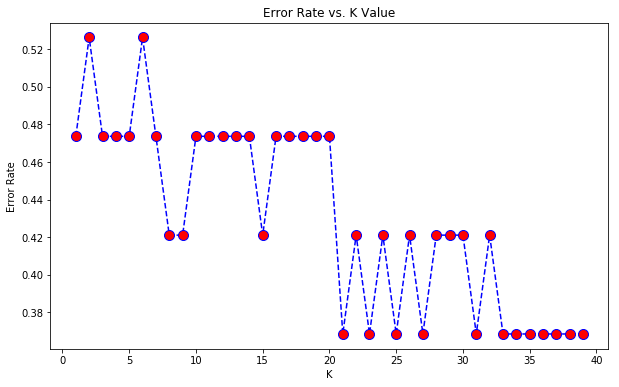

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
error_rate = [] 
  
# Will take some time 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(x_train, y_train) 
    pred_i = knn.predict(x_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 


In [30]:
#error rate for k=1 is very high
#error rate is least after k = 33

In [40]:
knn = KNeighborsClassifier(n_neighbors = 33) 
knn.fit(x_train, y_train) 
pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 
print('accuracy = ', knn.score(x_test, y_test))

[[9 0]
 [7 3]]
              precision    recall  f1-score   support

        fake       0.56      1.00      0.72         9
        real       1.00      0.30      0.46        10

   micro avg       0.63      0.63      0.63        19
   macro avg       0.78      0.65      0.59        19
weighted avg       0.79      0.63      0.58        19

accuracy =  0.631578947368421


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
acuracy = cross_val_score(estimator = knn, X = x_train, y = y_train, cv=10)
print("Model accuracy : {:0.2f}%".format(accuracy_score(pred,y_test)*100))
print("cross validation : {:0.2f}%".format(acuracy.mean()*100))

Model accuracy : 63.16%
cross validation : 65.71%
